In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from materials import materials
try:
    from scipy.constants import c
except:
    c = 299792458
print(materials.keys())

['FS', 'SF6', 'Sappho', 'SF4', 'SF5', 'SF2', 'SF1', 'SF10', 'SF11', 'Sapphe', 'SF14', 'SF15', 'KDPo', 'KDPe', 'SF57', 'BaF2', 'SrF2', 'SiO2o', 'KTPa', 'KTPb', 'SiO2e', 'KTPg', 'Si', 'BK7', 'YAG', 'ADPo', 'ADPe', 'KRS5', 'MgF2e', 'TiO2e', 'FSir', 'MgF2o', 'TiO2o', 'KBr', 'CaF2', 'Infrasil', 'ZnSe', 'SF66', 'BBOo', 'aBBOe', 'BBOe', 'aBBOo', 'CaCO3o', 'CaCO3e']


## Plot the index and dispersive properties of several glasses

In [3]:
l0, lf = 500e-9, 2000e-9
w0, wf = 2*np.pi*c/l0, 2*np.pi*c/lf
w = np.linspace(w0, wf, 200)
l = 2*np.pi*c/w

mats = ['FS', 'CaF2', 'SrF2', 'BaF2', 'BK7', 'SF11']

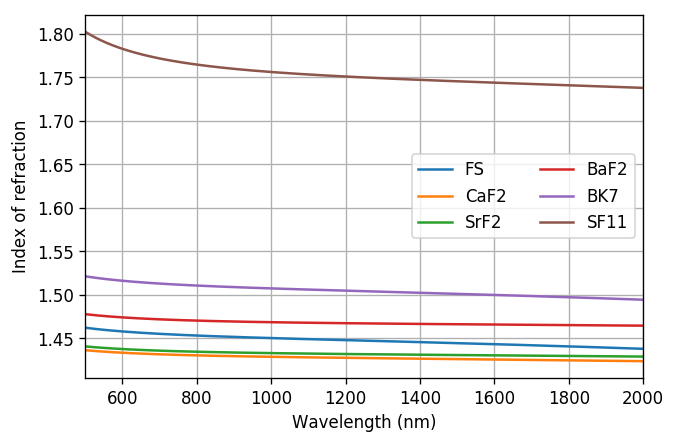

In [4]:
plt.figure(dpi=120)
for mat in mats:
    plt.plot(l*1e9, materials[mat].n(l), label=mat)
plt.grid()
plt.xlim(l0*1e9, lf*1e9)
plt.legend(ncol=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Index of refraction");

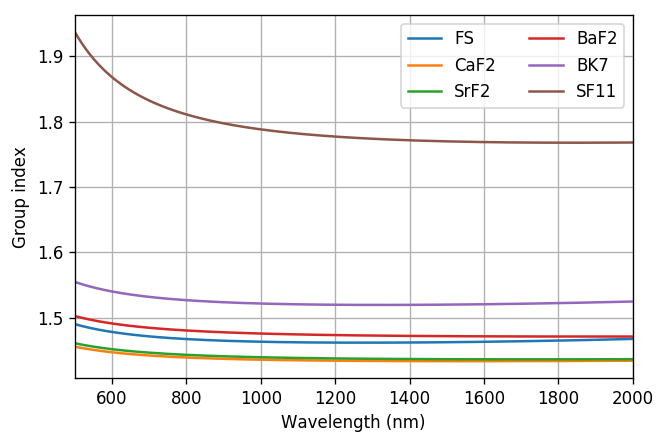

In [5]:
plt.figure(dpi=120)
for mat in mats:
    plt.plot(l*1e9, materials[mat].ng(l), label=mat)
plt.grid()
plt.xlim(l0*1e9, lf*1e9)
plt.legend(ncol=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Group index");

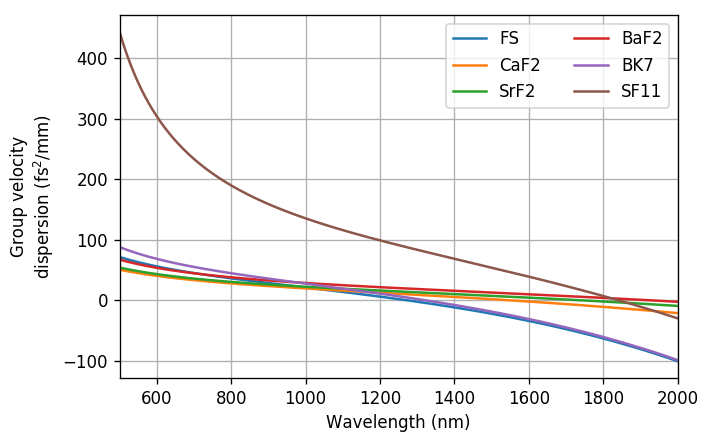

In [6]:
plt.figure(dpi=120)
for mat in mats:
    plt.plot(l*1e9, materials[mat].GVD(l) * (1e15)**2 * 1e-3, label=mat)
plt.grid()
plt.xlim(l0*1e9, lf*1e9)
plt.legend(ncol=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Group velocity\ndispersion (fs$^2$/mm)");

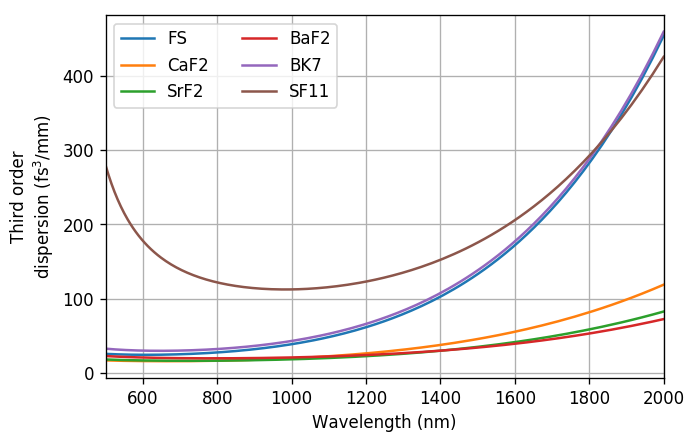

In [7]:
plt.figure(dpi=120)
for mat in mats:
    plt.plot(l*1e9, materials[mat].TOD(l) * (1e15)**3 * 1e-3, label=mat)
plt.grid()
plt.xlim(l0*1e9, lf*1e9)
plt.legend(ncol=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Third order\ndispersion (fs$^3$/mm)");

Text(0,0.5,'Fourth order\ndispersion (fs$^4$/mm)')

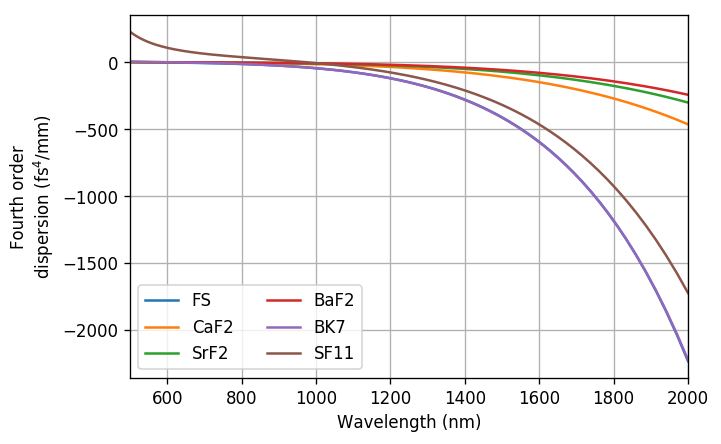

In [8]:
plt.figure(dpi=120)
for mat in mats:
    plt.plot(l*1e9, materials[mat].HOD(l, 4) * (1e15)**4 * 1e-3, label=mat)
plt.grid()
plt.xlim(l0*1e9, lf*1e9)
plt.legend(ncol=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Fourth order\ndispersion (fs$^4$/mm)")

## Find the phase matching angles for Type I sum frequency generation (SFG)

In [9]:
l0, lf = 500e-9, 2000e-9
Nl, Nth = 600, 500
spacing = 3
if spacing==1:
    l = np.linspace(l0, lf, Nl, dtype=float)
elif spacing==2:
    l = np.logspace(np.log10(l0), np.log10(lf), Nl, dtype=float)
elif spacing==3:
    l = 1 / np.linspace(1/l0, 1/lf, Nl)
    
thetas = np.linspace(0, np.pi/2, Nth)

no_0 = materials['BBOo'].n(l)
l_SFG = 1 / (1/l[:,None] + 1/l)
no_SFG, ne_SFG = materials['BBOo'].n(l_SFG), materials['BBOe'].n(l_SFG)
noe_SFG = 1 / np.sqrt((np.sin(thetas)[:,None,None]/ne_SFG)**2 + (np.cos(thetas)[:,None,None]/no_SFG)**2)

In [10]:
dK = 2*np.pi * (noe_SFG/l_SFG - (no_0/l + (no_0/l)[:,None]))
theta_pm = thetas[np.abs(dK).argmin(0)]

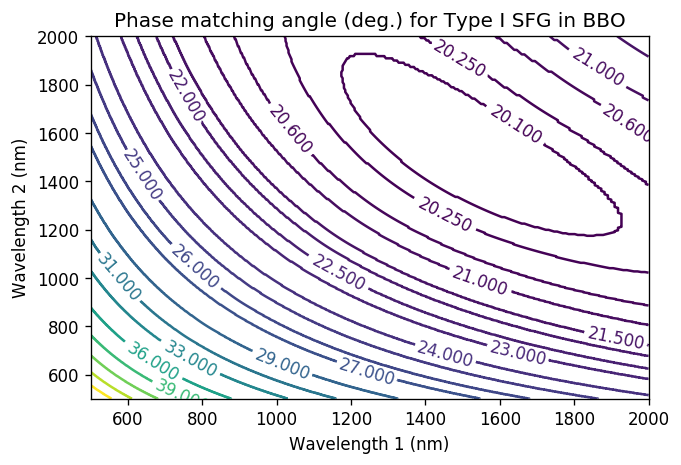

In [11]:
plt.figure(dpi=120)
cp_levels = np.concatenate([[20.1, 20.25, 20.6], np.arange(21, 23, 0.5), np.arange(23, 27, 1),
                            np.arange(27, 33, 2), np.arange(33, 50, 3)])
cp = plt.contour(l*1e9, l*1e9, np.rad2deg(theta_pm), cp_levels)
plt.clabel(cp, inline=True)
plt.title("Phase matching angle (deg.) for Type I SFG in BBO")
plt.xlabel("Wavelength 1 (nm)")
plt.ylabel("Wavelength 2 (nm)");